**Realizado por:** Rodolfo Jesús Cruz Rebollar

**Matrícula:** A01368326

**Grupo:** 101

### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, SimpleRNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [3]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [5]:
# Your code here

"""Columnas relevantes a seleccionar: Age, ParentalEducation, StudyTimeWeekly, Absenses, 
   ParentalSupport, Sports, GradeClass, GPA"""

dataset = data.iloc[:, [1, 4, 5, 6, 8, 10, 14, 13]]

dataset.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass,GPA
0,17,2,19.833723,7,2,0,2.0,2.929196
1,18,1,15.408756,0,1,0,1.0,3.042915
2,15,3,4.210570,26,2,0,4.0,0.112602
3,17,3,10.028829,14,3,0,3.0,2.054218
4,17,2,4.672495,17,3,0,4.0,1.288061


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [6]:
# Your code here

# Revisar si existen valores nulos o faltantes en cada columna del dataset

dataset.isna().any()

Age                  False
ParentalEducation    False
StudyTimeWeekly      False
Absences             False
ParentalSupport      False
Sports               False
GradeClass           False
GPA                  False
dtype: bool

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [10]:
# Your code here

# Dataset solo con variables predictoras sin la variable respuesta GPA

X = dataset.iloc[:, :7]

# Dataset solo con la variable respuesta GPA

y = dataset["GPA"]

# Crear conjuntos de entrenamiento y prueba para X, y

# Destinar 20% de los datos para probar el modelo y el 80% sobrante para entrenarlo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Estandarizar/normalizar los valores de las variables sin considerar a la variable respuesta (GPA)

scaler = StandardScaler()

std_features = scaler.fit_transform(X_train, X_test)

std_features

array([[ 1.37285117,  2.26211643,  1.46815853, ..., -1.9146563 ,
         1.51039849,  0.82018081],
       [-0.40585814,  0.23853507, -1.27677348, ..., -1.02021491,
        -0.66207693,  0.82018081],
       [ 0.48349652,  1.25032575, -1.10363153, ..., -1.9146563 ,
        -0.66207693,  0.82018081],
       ...,
       [-0.40585814,  0.23853507, -1.08325424, ..., -0.12577352,
         1.51039849,  0.01141489],
       [ 1.37285117,  0.23853507, -0.93767144, ...,  0.76866788,
        -0.66207693,  0.82018081],
       [ 1.37285117,  0.23853507, -0.7578795 , ..., -0.12577352,
        -0.66207693,  0.82018081]])

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [11]:
# Your code here

# Crear Red Neuronal secuencial

SNN = Sequential()

# Agregar dense input layer de 64 unidades, definir Relu como función de activación y dimensión de entrada igual a 7

SNN.add(Dense(64, activation="relu", input_dim = 7))

# Agregar una capa oculta más con 32 unidades y función de activación Relu

SNN.add(Dense(32, activation="relu"))

# Añadir capa de salida con 1 unidad 

SNN.add(Dense(1))

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [12]:
# Your code here

SNN.compile(optimizer="adam", loss="mse", metrics=["mae"])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [13]:
# Your code here

history = SNN.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9150 - mae: 0.9499 - val_loss: 0.1374 - val_mae: 0.2971
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245 - mae: 0.2853 - val_loss: 0.1370 - val_mae: 0.2965
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1145 - mae: 0.2721 - val_loss: 0.1024 - val_mae: 0.2596
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1003 - mae: 0.2566 - val_loss: 0.1053 - val_mae: 0.2624
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0988 - mae: 0.2541 - val_loss: 0.1040 - val_mae: 0.2637
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0900 - mae: 0.2439 - val_loss: 0.0968 - val_mae: 0.2505
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0836 - mae: 0.2320 - val_loss: 0.1023 - val_mae: 0.2588
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0869 - mae: 0.2364 - val_loss: 0.1055 - val_mae: 0.2657
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

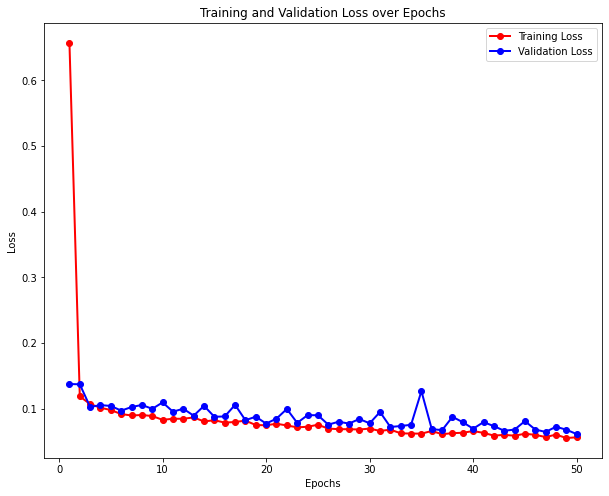

In [14]:
# Gráfico de tamaño 10 x 8

plt.figure(figsize=(10, 8))

# Gráfica de la función de pérdida en el entrenamiento durante 50 épocas o iteraciones

plt.plot(range(1, 51), history.history["loss"], linewidth = 2, marker = "o", label = "Training Loss", color = "red")

# Gráfica de función de pérdida en la validación durante 50 épocas

plt.plot(range(1, 51), history.history["val_loss"], linewidth = 2, marker = "o", label = "Validation Loss", color = "blue")

# Eje x: número de época

plt.xlabel("Epochs")

# Eje Y: valores de la función de pérdida

plt.ylabel("Loss")

# Título del gráfico

plt.title("Training and Validation Loss over Epochs")

# Leyenda

plt.legend()

# Mostrar gráfico

plt.show()

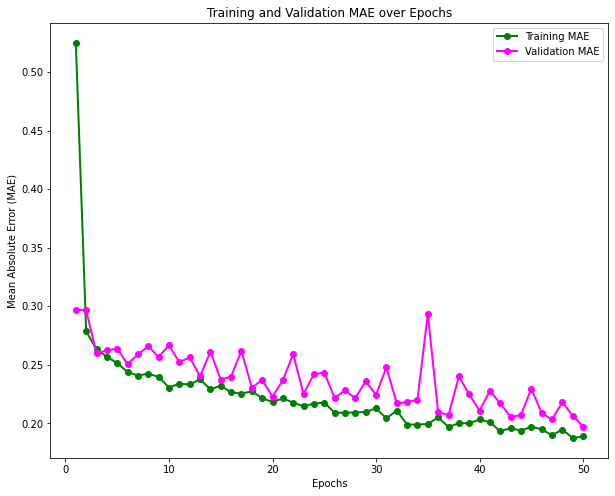

In [15]:
# Your code here

# Gráfico de tamaño 10 x 8

plt.figure(figsize=(10, 8))

# Gráfica del MAE en el entrenamiento durante 50 épocas o iteraciones

plt.plot(range(1, 51), history.history["mae"], linewidth = 2, marker = "o", label = "Training MAE", color = "green")

# Gráfica del MAE en la validación durante 50 épocas

plt.plot(range(1, 51), history.history["val_mae"], linewidth = 2, marker = "o", label = "Validation MAE", color = "magenta")

# Eje x: número de época

plt.xlabel("Epochs")

# Eje Y: valores de la función de pérdida

plt.ylabel("Mean Absolute Error (MAE)")

# Título del gráfico

plt.title("Training and Validation MAE over Epochs")

# Leyenda

plt.legend()

# Mostrar gráfico

plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [16]:
# Your code here

loss_evaluation = SNN.evaluate(X_test, y_test)

print(f'Loss values: {loss_evaluation}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0628 - mae: 0.1842 
Loss values: [0.057948123663663864, 0.18323682248592377]


En el resultado anterior es posible observar que al final del proceso de evaluación del modelo, el valor final de la función de pérdida es de 0.0628, mientras que el valor final del MAE es de 0.1842, los cuales son valores mayormente bajos, lo cual indica que al final de todo el proceso, el modelo generado resulta ser bastante bueno, lo cual se encuentra también respaldado por el hecho de que los valores finales de pérdida (0.0579 y 0.1832) son también mayormente bajos, por lo cual, en base a lo anterior, es posible afirmar que las predicciones del GPA derivadas del modelo tendrán un elevado grado de precisión, por lo cual, serán bastante cercanas a los valores reales del GPA, indicando que el modelo generado es en su mayoría adecuado para predecir el valor del GPA para los alumnos en cuestión. 

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [17]:
# Your code here

GPA_predicted = SNN.predict(X_test)

pred_real = pd.DataFrame({"Real": y_test, "Predicted": np.reshape(GPA_predicted, len(GPA_predicted))})

pred_real.reset_index(drop = True, inplace = True)

pred_real

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Real,Predicted
1004,1.427724,1.409159
196,3.117354,3.204351
2342,2.037769,1.999401
1708,3.548521,3.660019
435,0.248977,0.453828
...,...,...
986,1.562360,1.966774
120,2.174903,2.229356
283,2.332540,2.434402
1740,2.777967,2.639778


En términos generales, el modelo resulta ser bastante bueno, porque en el dataframe de datos reales contra predicciones se aprecia que existen diferencias mayormente pequeñas entre los valores reales del GPA y los predichos por el modelo, lo cual respalda el hecho de que el modelo posea valores mayormente bajos de pérdida (MSE) y de MAE, por lo que tomando esto en consideración, es posible afirmar que el modelo en cuestión es mayormente adecuado para predecir el GPA de los estudiantes de una manera mayormente precisa y por lo tanto también confiable, tomando en cuenta algunos atributos o cualidades mayormente relevantes del alumnado en general. 

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2
- Cambios implementados:
   - Model Definition: el nuevo modelo será una red secuencial, esta vez la primer capa tendrá 96 unidades y además
   habrá otra capa oculta adicional con 48 unidades. 

   - Model Compile: el nuevo modelo utilizará un optimizador de tipo RMSprop en lugar de Adam. 

   - Model Training: el nuevo modelo será entrenado con un total de 100 épocas o iteraciones en lugar de 50. 

In [18]:
# Your code here

# Crear red neuronal secuencial

modelo2 = Sequential()

# Agregar una capa Dense con 96 unidades y una función de activación Relu

modelo2.add(Dense(96, activation="relu", input_dim = 7))

# Agregar una capa oculta adicional con 48 unidades y función de activación Relu

modelo2.add(Dense(48, activation = "relu"))

# Añadir capa de salida

modelo2.add(Dense(1))

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilar el modelo utilizando en esta ocasión, el optimizador de tipo RMSprop

modelo2.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [20]:
# Entrenar el modelo 2 con 100 épocas

modelo2.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0849 - mae: 0.6298 - val_loss: 0.3280 - val_mae: 0.4841
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2001 - mae: 0.3611 - val_loss: 0.1464 - val_mae: 0.3138
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1576 - mae: 0.3181 - val_loss: 0.1976 - val_mae: 0.3644
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1341 - mae: 0.2937 - val_loss: 0.1253 - val_mae: 0.2834
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1308 - mae: 0.2889 - val_loss: 0.1064 - val_mae: 0.2625
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1280 - mae: 0.2871 - val_loss: 0.1044 - val_mae: 0.2589
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1260 - mae: 0.2837 - val_loss: 0.1407 - val_mae: 0.3049
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102 - mae: 0.2652 - val_loss: 0.1053 - val_mae: 0.2623
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [21]:
# Evaluar el segundo modelo entrenado con 100 épocas

eval_m2 = modelo2.evaluate(X_test, y_test)

# Desplegar los mejores valores de pérdida y de MAE del modelo 2

print(f'loss values modelo 2: {eval_m2}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0658 - mae: 0.1924 
loss values modelo 2: [0.05936802551150322, 0.1850443184375763]


#### Model 3:
- Cambios implementados:
   - Model Definition: el nuevo modelo será una red secuencial, esta vez la primer capa tendrá 128 unidades y además
   habrá otra capa oculta adicional con 64 unidades. 

   - Model Compile: el nuevo modelo utilizará un optimizador de tipo Adagrad en lugar de Adam. 

   - Model Training: el nuevo modelo será entrenado con un total de 150 épocas o iteraciones en lugar de 50

In [22]:
# Your code here

# Crear 3er modelo de red neuronal secuencial

modelo3 = Sequential()

# Agregar la primer capa Dense con 128 unidades y una función de activación de tipo Relu

modelo3.add(Dense(128, activation="relu", input_dim = 7))

# Agregar capa oculta extra con 64 unidades igualmente con una función de activación Relu

modelo3.add(Dense(64, activation="relu"))

# Agregar capa de salida para efectuar predicciones

modelo3.add(Dense(1))

In [23]:
# Compilar el modelo con capas de 128 y 64 unidades respectivamente, optimizador Adagrad y métrica MAE

modelo3.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [24]:
# Entrenar el modelo 3 con 150 épocas

modelo3.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2)

Epoch 1/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6031 - mae: 0.5777 - val_loss: 0.1729 - val_mae: 0.3329
Epoch 2/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1543 - mae: 0.3187 - val_loss: 0.1381 - val_mae: 0.2982
Epoch 3/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1221 - mae: 0.2832 - val_loss: 0.1279 - val_mae: 0.2882
Epoch 4/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1166 - mae: 0.2787 - val_loss: 0.1199 - val_mae: 0.2794
Epoch 5/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1081 - mae: 0.2705 - val_loss: 0.1198 - val_mae: 0.2786
Epoch 6/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031 - mae: 0.2599 - val_loss: 0.1145 - val_mae: 0.2727
Epoch 7/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1011 - mae: 0.2574 - val_loss: 0.1108 - val_mae: 0.2680
Epoch 8/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 - mae: 0.2567 - val_loss: 0.1096 - val_mae: 0.2663
Epoch 9/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [25]:
# Evaluar el 3er modelo entrenado con 150 épocas

loss3 = modelo3.evaluate(X_test, y_test)

# Mostrar los valores mínimos de pérdida y de MAE del modelo 3

print(f'Loss values modelo 3: {loss3}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0817 - mae: 0.2250 
Loss values modelo 3: [0.08308175951242447, 0.22887933254241943]


## Loss y MAE de los 3 modelos

| MODEL | LOSS | MAE |
| ----- | ---- | --- |
| Modelo 1 (original) | 0.0628 | 0.1842 |
| Modelo 2 | 0.0658 | 0.1924 |
| Modelo 3 | 0.0817 | 0.2250 |

**Nota: Modelo 1 se refiere al primer modelo generado antes de los 2 adicionales.**

## Predicción de GPA para 5 estudiantes con los 3 modelos

In [26]:
# Visualizar los alumnos que pertenecen al dataset de prueba para elegir 5 de ellos

X_test

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass
1004,15,4,0.135763,17,2,1,4.0
196,16,4,1.989925,0,1,0,1.0
2342,15,0,10.588715,15,3,0,2.0
1708,18,2,16.208658,1,3,0,0.0
435,18,0,3.576821,27,1,1,4.0
...,...,...,...,...,...,...,...
986,18,2,8.412605,16,3,1,4.0
120,18,3,3.170405,12,1,1,3.0
283,17,1,5.141922,5,1,0,3.0
1740,18,0,10.281614,10,3,0,2.0


In [27]:
# Elegir los alumnos número 120, 283, 986, 1004 y 1726 del dataset de prueba

alumnos5 = dataset.iloc[[120, 283, 986, 1004, 1726], :]

alumnos5

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass,GPA
120,18,3,3.170405,12,1,1,3.0,2.174903
283,17,1,5.141922,5,1,0,3.0,2.332540
986,18,2,8.412605,16,3,1,4.0,1.562360
1004,15,4,0.135763,17,2,1,4.0,1.427724
1726,18,0,15.610436,26,3,0,4.0,0.863545


In [28]:
# Predecir el GPA para los 5 alumnos con el primer modelo (SNN)

pred_M1 = SNN.predict(alumnos5.iloc[:, :7])

# Predecir GPA con el modelo 2 (modelo2)

pred_M2 = modelo2.predict(alumnos5.iloc[:, :7])

# Predecir GPA con el modelo 3 (modelo3)

pred_M3 = modelo3.predict(alumnos5.iloc[:, :7])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [29]:
pred_M1 = pd.Series(np.reshape(pred_M1, len(pred_M1)))
pred_M2 = pd.Series(np.reshape(pred_M2, len(pred_M2)))
pred_M3 = pd.Series(np.reshape(pred_M3, len(pred_M3)))

In [30]:
pred_3modelos_5alumnos = pd.DataFrame({"GPA M1": pred_M1, "GPA M2": pred_M2, "GPA M3": pred_M3, 
                                       "Actual": pd.Series(dataset["GPA"][[120, 283, 986, 1004, 1726]]).reset_index(drop = True)})

pred_3modelos_5alumnos.index = [120, 283, 986, 1004, 1726]

pred_3modelos_5alumnos.index.name = "Student_Index"

pred_3modelos_5alumnos

,GPA M1,GPA M2,GPA M3,Actual
Student_Index,,,,
120,2.229356,2.133603,2.181287,2.174903
283,2.434402,2.197772,2.473202,2.332540
986,1.966774,1.808585,2.173240,1.562360
1004,1.409159,1.441483,1.310229,1.427724
1726,0.935799,1.011831,1.163381,0.863545


Finalmente, es importante mencionar que de acuerdo a las tablas comparativas anteriores, aquel modelo que resultó ser el mejor, es el modelo 1 que corresponde a la red neuronal secuencial conformada por una capa de 64 unidades y otra capa oculta adicional de 32 unidades y entrenada con un optimizador de tipo Adam y un total de 50 épocas o iteraciones, esto principalmente debido a que éste modelo tiene el menor valor de pérdida (Loss) y de MAE, siendo éstos valores de 0.0628 y 0.1842, respectivamente, superando así por poco a los modelos 2 y 3 generados posteriormente, por lo que el modelo 1 pasa a ser el mejor de los 3 puestos a prueba para predecir de la manera más precisa y confiable posible, el GPA de los alumnos. 